# Assignment 5

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

from numpy import exp
from textwrap import wrap

%load_ext Cython

## 6) COMPUTATION: Finite Difference Time Domain method (extended)

In [2]:
%%time
# Normal Python
# =============
x_space = np.arange(-400, 401, 1)
t_max = 500
imp0 = 377
x_len = len(x_space)
H_y = np.zeros((t_max, x_len))
E_z = np.zeros((t_max, x_len))
temp1 = np.zeros(x_len)
temp2 = np.zeros(x_len)
R = temp1 + 1
# muR = np.zeros(len(x_space)) + 1

R[400-140] = R[400+140] = 5
R[:400-200] = R[400+200:] = 10**10
# muR[70] = 5

for i in range(0, t_max, 1):
    temp1[x_len-1] = temp1[x_len-2]
    for j in range(0, x_len-1, 1):
        temp1[j] += (temp2[j+1] - temp2[j]) / imp0 / R[j]
    
    temp2[0] = temp2[1]
    for j in range(1, x_len, 1):    
        temp2[j] += (temp1[j] - temp1[j-1]) * imp0 / R[j]
    
    temp2[400] += exp(-(i-30)*(i-30)/100)
    
    E_z[i,:] = temp2[:]
    H_y[i,:] = temp1[:]

CPU times: user 1.99 s, sys: 40.6 ms, total: 2.03 s
Wall time: 2.13 s


In [3]:
%%time
%%cython -a -c=-ffast-math

# import cython as c
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp
from cython cimport floating

cdef np.ndarray cx_space = np.arange(-400, 401, 1, dtype=float)

cdef int ct_max = 500
cdef int cimp0 = 377
cdef int cx_len = len(cx_space)
cdef np.ndarray cH_y = np.zeros((ct_max, cx_len), dtype=float)
cdef np.ndarray cE_z = np.zeros((ct_max, cx_len), dtype=float)
cdef np.ndarray ctemp1 = np.zeros(cx_len, dtype=float)
cdef np.ndarray ctemp2 = np.zeros(cx_len, dtype=float)
cdef np.ndarray cR = ctemp1 + 1

cR[400-140] = cR[400+140] = 5
cR[:400-200] = cR[400+200:] = 10**10

cdef int i, j 

for i in range(0, ct_max, 1):
    ctemp1[cx_len-1] = ctemp1[cx_len-2]
    for j in range(0, cx_len-1, 1):
        ctemp1[j] += (ctemp2[j+1] - ctemp2[j]) / cimp0 / cR[j]
    
    ctemp2[0] = ctemp2[1]
    for j in range(1, cx_len, 1):    
        ctemp2[j] += (ctemp1[j] - ctemp1[j-1]) * cimp0 / cR[j]
    
    ctemp2[400] += exp(-(i-30)*(i-30)/100)
    
    cE_z[i,:] = ctemp2[:]
    cH_y[i,:] = ctemp1[:]

CPU times: user 1.19 s, sys: 24.2 ms, total: 1.22 s
Wall time: 1.28 s


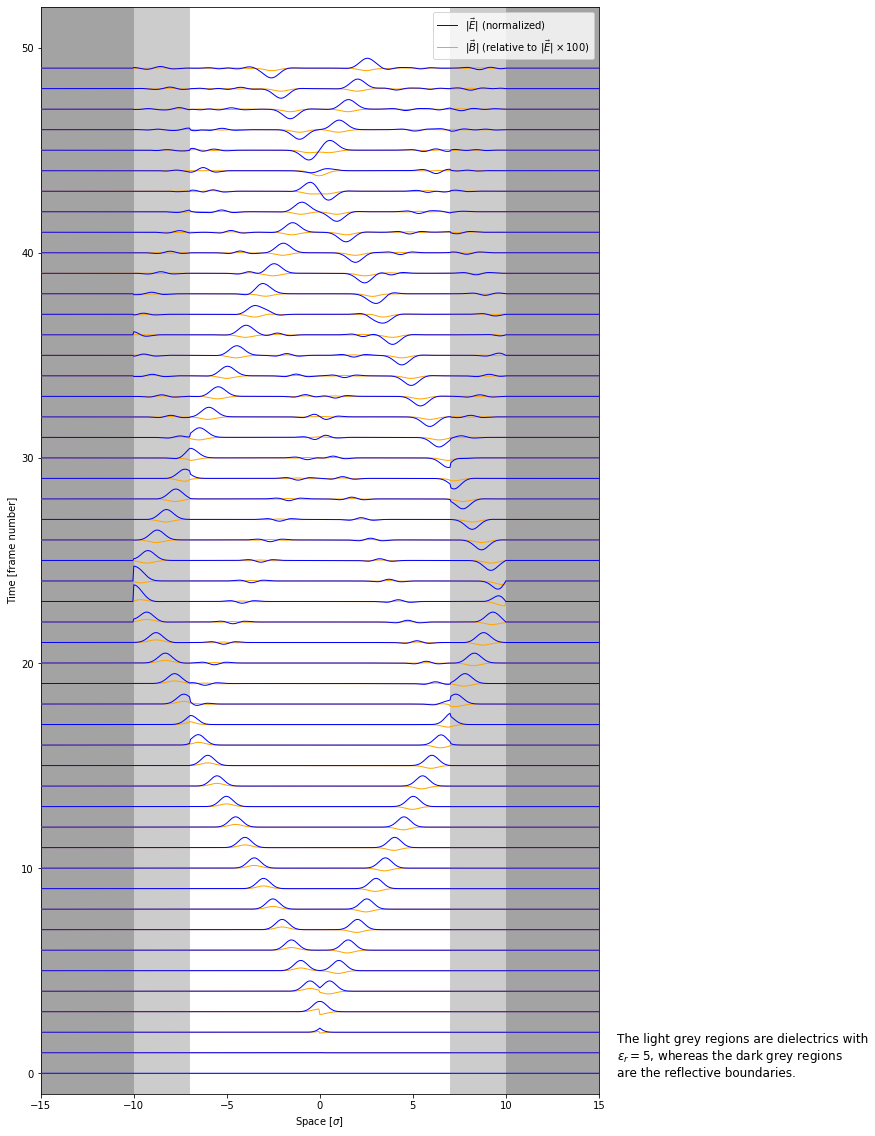

In [4]:
plt.figure(figsize = (10, 20))
for i in range(0, t_max, 10):
    plt.plot(x_space/20, E_z[i, :] + i/10, color="b", zorder=10, linewidth=1)
    plt.plot(x_space/20, H_y[i, :]*100 + i/10, color="orange", zorder=9, linewidth=1)

plt.fill([-15,-10,-10,-15], [-1,-1,60,60], 'black', alpha=0.2)
plt.fill([15,10,10,15], [-1,-1,60,60], 'black', alpha=0.2)
plt.fill([-15,-7,-7,-15], [-1,-1,60,60], 'black', alpha=0.2)
plt.fill([15,7,7,15], [-1,-1,60,60], 'black', alpha=0.2)

plt.xlim([-15, 15])
plt.ylim(-1, 52)
plt.legend((r'$|\vec{E}|$ (normalized)', r'$|\vec{B}|$ (relative to $|\vec{E}| \times 100$)'))
plt.xlabel(r'Space [$\sigma$]')
plt.ylabel('Time [frame number]')

caption = r"The light grey regions are dielectrics with $\epsilon_r = 5$, whereas the dark grey regions are the reflective boundaries."
plt.text(16, -0.15, "\n".join(wrap(caption, 50)), ha='left', fontsize=12, wrap=False)

plt.show()